# Objectives

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are two classes in this dataset: Positive and Negative.


# Data Definition

**Tweet ID:** ID of Tweet

**Entity:** Entity that Tweet talks about

**sentiment:** Sentiment of the tweet text regarding the entity (Positive or Negative)

**tweet:** Tweet Text

# Table of Contents

1. **[Importing Important Libraries](#import_lib)**
2. **[Read the data and drop duplicates](#read_drop_data)**
    - 2.1 - [Read the data](#read_data)
    - 2.2 - [Removing duplicate values from the dataset](#drop_duplicates)
3. **[Exploratory Data Analysis (EDA)](#eda)**
4. **[Data preprocessing](#data_preprocessing)**
5. **[Visualize word frequency using word cloud for positive and negative tweets](#viz_pos_neg)**
    - 5.1 - [WordCloud for positive tweets](#viz_pos)
    - 5.2 - [WordCloud for negative tweets](#viz_neg)
6. **[Model Training and Evaluation](#model_train_evaluate)**
    - 6.1 - [Label Encoding](#label_encoding)
    - 6.2 - [Assigning feature and target](#assign)
    - 6.3 - [Train-test split](#train_test_split)
7. **[Applying count vectorizer and Tf-Idf](#apply_cv_tf_idf)**
    - 7.1 - [Count Vectorizer](#apply_cv)
        - 7.1.1 - [Naive Bayes with Count Vectorizer](#nb_with_cv)
    - 7.2 - [Tf - Idf](#apply_tf_idf)
        - 7.2.1 - [Naive Bayes with Tf - Idf](#nb_with_tf_idf)
8. **[Compare the model performance using accuracy](#compare_models)**
9. **[Plot ROC curve and get AUC values](#plot_roc_auc)**
    - 9.1 - [Naive Bayes with CountVectorizer - ROC AUC](#plot_nb_with_cv)
    - 9.2 - [Naive Bayes with TF-IDF - ROC AUC](#plot_nb_with_tf_idf)
10. **[Inference](#inference)**

<a id='import_lib'></a>
# 1. Importing necessary libraries

In [177]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

<a id='read_drop_data'></a>
# 2. Read the data and drop duplicates

Remove stopwords and non-alphanumeric characters

<a id='read_data'></a>

## 2.1 Read the data

In [179]:
df = pd.read_csv('twitter_training.csv')

In [180]:
# Check first five rows of the data

df.head()

,Tweet ID,Entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [181]:
# Check last five rows of the data

df.tail()

,Tweet ID,Entity,sentiment,tweet
42926,9200,Nvidia,Positive,Just realized that the Windows partition of my...
42927,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
42928,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
42929,9200,Nvidia,Positive,Just realized between the windows partition of...
42930,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [182]:
# check the dimensions of the data 

df.shape

(42931, 4)

In [183]:
# check the data types and info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet ID   42931 non-null  int64 
 1   Entity     42931 non-null  object
 2   sentiment  42931 non-null  object
 3   tweet      42931 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [184]:
# Check nulls

df.isna().sum()

Tweet ID     0
Entity       0
sentiment    0
tweet        0
dtype: int64

In [185]:
# statistical summary of the data 

df.describe()

,Tweet ID
count,42931.000000
mean,6558.060399
std,3667.945007
min,1.000000
25%,3295.000000
50%,6665.000000
75%,9578.000000
max,13198.000000


<a id='drop_duplicates'></a>
## 2.2 Removing duplicate values from the dataset

In [186]:
# Displaying all the duplicate values

df[df.duplicated()]

,Tweet ID,Entity,sentiment,tweet
14,2404,Borderlands,Positive,that was the first borderlands session in a lo...
20,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
92,2425,Borderlands,Negative,"""What a bitch!"""
109,2429,Borderlands,Positive,Bioshock AND borderlands coming to the switch ...
123,2432,Borderlands,Positive,Jumping on stream early today! Playing some mo...
...,...,...,...,...
42764,9151,Nvidia,Positive,"I'm no NVidia fanboy (I hate their drivers, an..."
42770,9156,Nvidia,Positive,And there it is. Wow.
42831,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
42886,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


**Observation:**

Here we can see that there are **1602 rows** which have duplicate data.

Since duplicate data doesn't add any additional information and just increases the processing time, it is preferrable to drop these duplicate rows.

In [187]:
# Displaying shape of the dataset before dropping duplicate rows

print("Total no. rows and columns before dropping duplicate rows:", df.shape)


# Dropping duplicate rows

df.drop_duplicates(inplace = True)


# Displaying shape of the dataset after dropping duplicate rows

print("Total no. rows and columns after dropping duplicate rows:", df.shape)

Total no. rows and columns before dropping duplicate rows: (42931, 4)
Total no. rows and columns after dropping duplicate rows: (41329, 4)


<a id='eda'></a>
# 3. Exploratory Data Analysis (EDA)

In [188]:
# Count the number of positive and negative tweets

target_counts = df['sentiment'].value_counts()
target_counts

Negative    21652
Positive    19677
Name: sentiment, dtype: int64

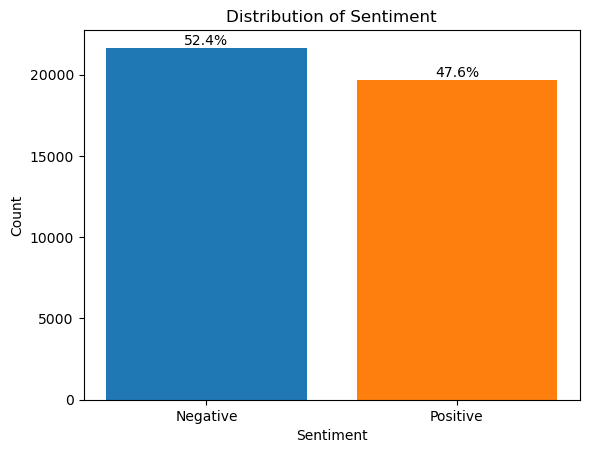

In [189]:
# Plot the sentiment distribution

plt.bar(target_counts.index, target_counts.values, color=('tab:blue','tab:orange'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')


# Add percentages on top of each bar

total = sum(target_counts.values)
for i, count in enumerate(target_counts.values):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

**Inference:**

From the above plot we can see that the no. of negative tweets are more than positive tweets

<a id='data_preprocessing'></a>
# 4. Data preprocessing

In [190]:
# Remove all the special characters

stop_words = set(stopwords.words('english'))


# Define a function to clean the text using regular expressions

def clean_tweet(tweet):
    # Convert text to lowercase and remove leading/trailing whitespaces
    tweet1 = tweet.lower().strip()
    
    # Remove any non-alphanumeric characters
    tweet1 = re.sub('[^a-zA-Z]', ' ', tweet1)
    
    # Remove extra whitespaces
    tweet1 = re.sub(r'\s+', ' ', tweet1)
    
    tokens = word_tokenize(tweet1)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    tweet1 = ' '.join(tokens)
    
    return tweet1

In [191]:
# Clean the 'tweet' column and apply the clean_tweet function here

df['clean_tweet'] = df['tweet'].apply(clean_tweet)
df.head() 

,Tweet ID,Entity,sentiment,tweet,clean_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


In [192]:
# dropping column 'tweet'

df= df.drop(df.columns[3], axis=1)

In [193]:
df.head()

,Tweet ID,Entity,sentiment,clean_tweet
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder


<a id='viz_pos_neg'></a>
# 5. Visualize word frequency using word cloud for positive and negative tweets

In [194]:
df.sentiment = df.sentiment.astype('object')

In [195]:
#converting sentiment variable to numeric labels

df.sentiment = [ 1 if each == "Positive" else 0 for each in df.sentiment]

<a id='viz_pos'></a>
## 5.1 WordCloud for positive tweets

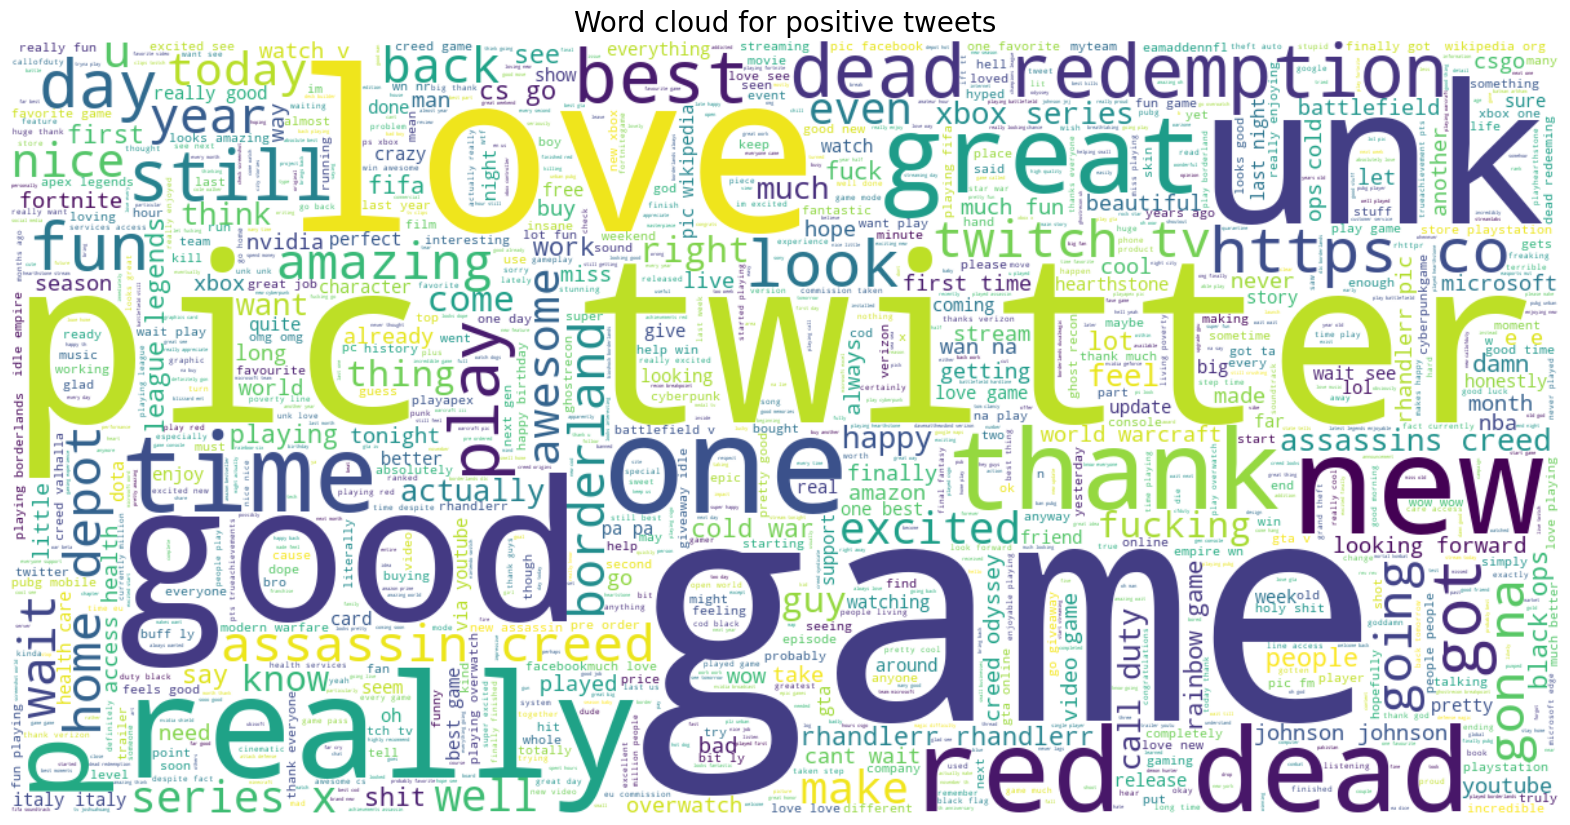

In [196]:
positive_data = df[df.sentiment == 1]['clean_tweet']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive tweets',fontsize = 20)
plt.show()

<a id='viz_neg'></a>
## 5.2 WordCloud for negative tweets

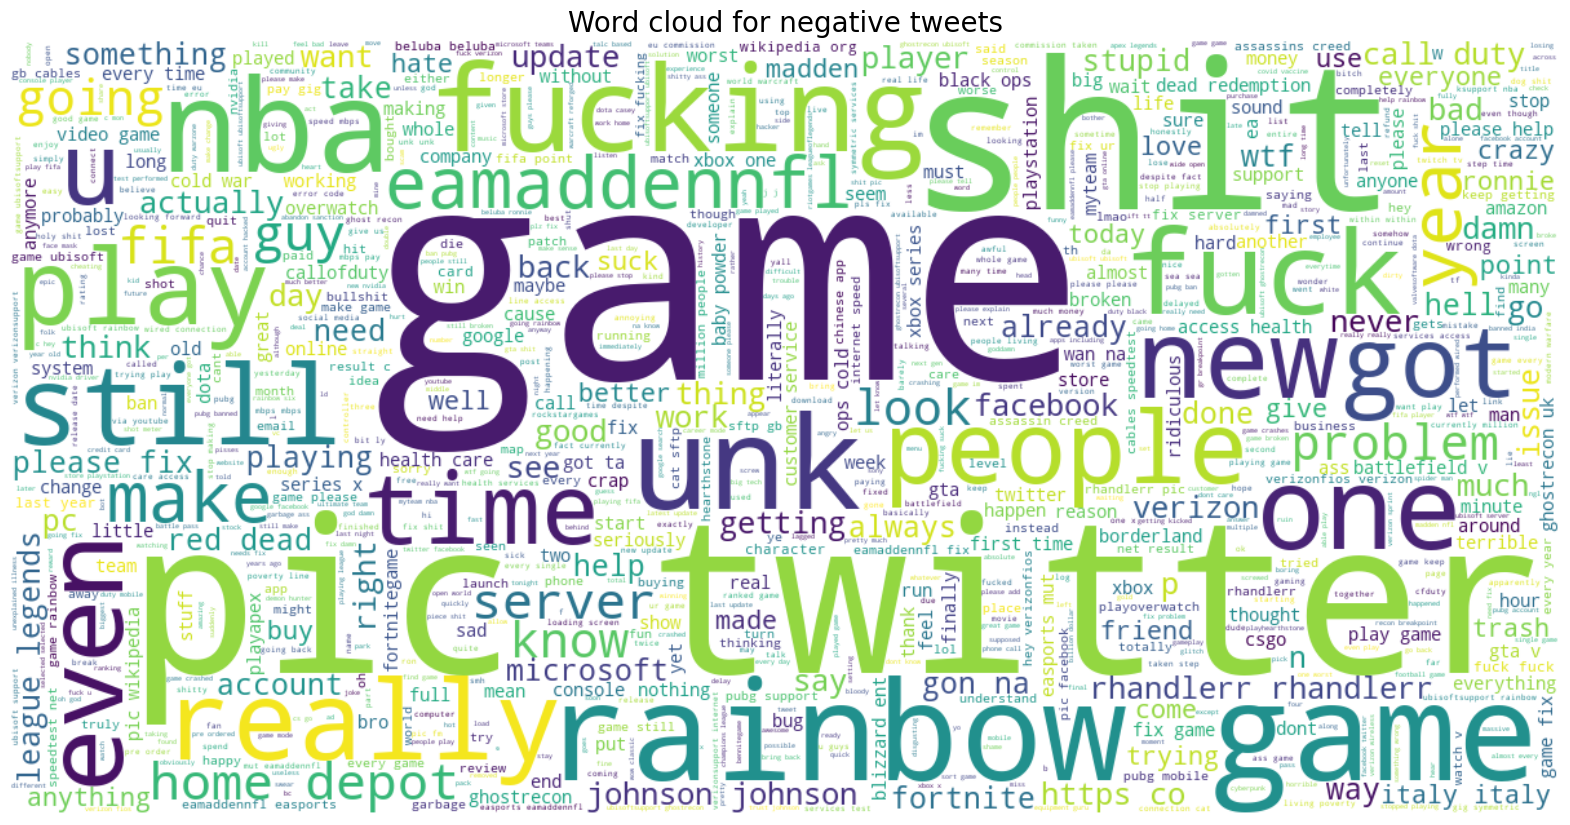

In [197]:
negative_data = df[df.sentiment == 0]['clean_tweet']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative tweets',fontsize = 20)
plt.show()

<a id='model_train_evaluate'></a>
# 6. Model Training and Evaluation

<a id='label_encoding'></a>
## 6.1 Label Encoding

In [198]:
# unique values of labels

label_encoder = LabelEncoder()


# Fit label encoder and transform the 'category' column

df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

<a id='assign'></a>
## 6.2 Assigning feature and target

In [199]:
# split target and features 

X = df.clean_tweet
y = df['sentiment']

<a id='train_test_split'></a>
## 6.3 Train-test split

In [200]:
# split the feature & target in 75% train & 25% test data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30996,), (30996,), (10333,), (10333,))

<a id='apply_cv_tf_idf'></a>
#  7. Applying count vectorizer and Tf-Idf

<a id='apply_cv'></a>
## 7.1 Count Vectorizer

In [201]:
# Applying count vectorizer

vectorizer = CountVectorizer()


# fit and transform train test vectorizer

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [202]:
# check dtype and format

X_train_vec, X_test_vec

(<30996x17307 sparse matrix of type '<class 'numpy.int64'>'
 	with 314982 stored elements in Compressed Sparse Row format>,
 <10333x17307 sparse matrix of type '<class 'numpy.int64'>'
 	with 103746 stored elements in Compressed Sparse Row format>)

<a id='nb_with_cv'></a>
### 7.1.1 Naive Bayes with Count Vectorizer

In [203]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [204]:
# Tuning model using GridSearchCV

params = {'alpha': [0, 0.1, 0.01, 0.001, 0.0001, 1]}
grid_search = GridSearchCV(model,params, cv=5)
grid_search.fit(X_train_vec, y_train)
best_model = grid_search.best_estimator_

In [205]:
# Evaluating model's performance

y_pred = best_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
 
print("Naive Bayes Model Performance (NB count vectorizer Accuracy):", accuracy, "or", round(accuracy * 100, 2), "%")

Naive Bayes Model Performance (NB count vectorizer Accuracy): 0.8893835285009194 or 88.94 %


<a id='apply_tf_idf'></a>
## 7.2 Tf - Idf

In [206]:
# Applying Tf-Idf transformation and building a model

vectorizer = TfidfVectorizer()


# fit and transform train test vectorizer

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

<a id='nb_with_tf_idf'></a>
### 7.2.2 Naive Bayes with Tf - Idf

In [207]:
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf,y_train)

MultinomialNB()

In [208]:
# Tuning model using GridSearchCV

grid_search_tfidf = GridSearchCV(model_tfidf, params, cv=5)
grid_search_tfidf.fit(X_train_tfidf, y_train)
best_model_tfidf = grid_search_tfidf.best_estimator_

In [209]:
# Evaluating model's performance

y_pred_tfidf = best_model_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

In [210]:
# Accuracy for naive bayes(tf-idf)

print("Naive Bayes Model with Tf-Idf Performance (NB Tf-Idf Accuracy):", accuracy_tfidf, "or", round(accuracy_tfidf * 100, 2), "%")

Naive Bayes Model with Tf-Idf Performance (NB Tf-Idf Accuracy): 0.899254814671441 or 89.93 %


<a id='compare_models'></a>
# 8. Compare the model performance using accuracy

In [211]:
models = pd.DataFrame({
    'Model' : ['Naive Bayes with Count Vectorizer', 'Naive Bayes with Tf-Idf'],
    'Accuracy' : [round(accuracy * 100, 2), round(accuracy_tfidf * 100, 2)]
})

models

,Model,Accuracy
0,Naive Bayes with Count Vectorizer,88.94
1,Naive Bayes with Tf-Idf,89.93


<a id='plot_roc_auc'></a>
# 9. Plot ROC curve and get AUC values

In [212]:
def plot_roc_auc(y_true, y_pred_probs):
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = roc_auc_score(y_true, y_pred_probs)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

<a id='plot_nb_with_cv'></a>
## 9.1 Naive Bayes with CountVectorizer - ROC AUC

In [213]:
y_true = y_test
y_pred_probs = y_pred

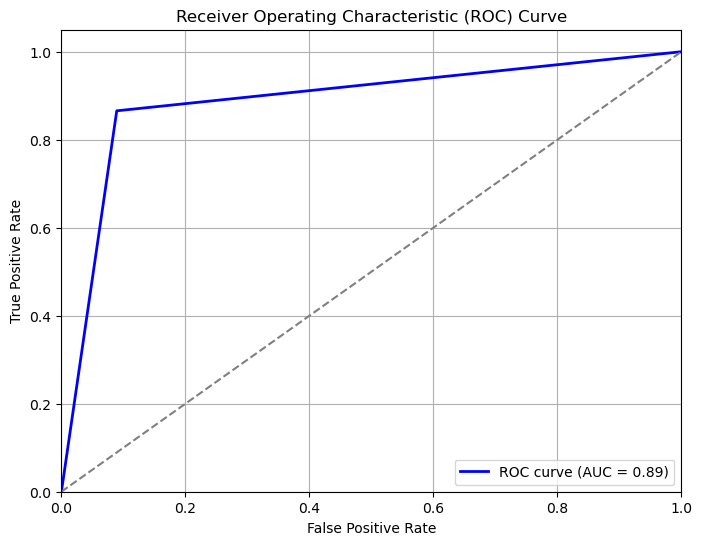

In [214]:
plot_roc_auc(y_true, y_pred_probs)

<a id='plot_nb_with_tf_idf'></a>
## 9.2 Naive Bayes with TF-IDF - ROC AUC

In [215]:
y_true = y_test
y_pred_probs = y_pred_tfidf

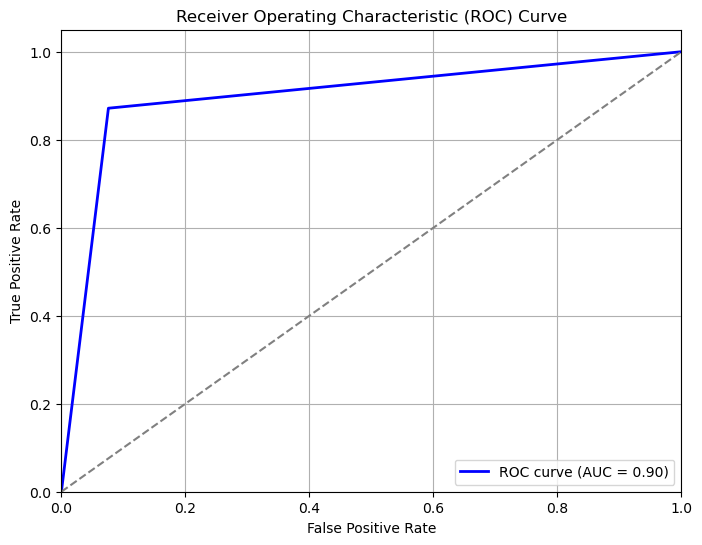

In [216]:
plot_roc_auc(y_true, y_pred_probs)

<a id='inference'></a>
# 10. Inference

**Both the models have similar performance, achieving an accuracy of approximately 0.90 or 90% on the test data**

Summary of the model evaluation for both classifiers:

1. **Naive Bayes with CountVectorizer**:
   - Accuracy: 0.8893835285009194 or 88.94 %
   - ROC curve (AUC): 0.89


2. **Naive Bayes with TF-IDF**:
   - Accuracy: 0.899254814671441 or 89.93 %
   - ROC curve (AUC): 0.90